In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("Downloads/customer_churn.csv")#read csv

In [3]:
#Basic Exploration 
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

  CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
0     C00001       6              64          1540        One year   
1     C00002      21             113          1753  Month-to-month   
2     C00003      27              31          1455        Two year   
3     C00004      53              29          7150  Month-to-month   
4     C00005      16             185          1023        One year   

      PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
0       Credit Card               No              1      0  
1  Electronic Check              Yes              1      0  
2       Credit Card               No              1      0  
3  Electronic Check               No              1      0  
4  Electronic Check               No              1      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID  

In [5]:
#Data Cleaning

#Convert categorical columns properly:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


#Convert Churn to numeric if needed:

df['Churn'] = df['Churn'].astype(int)

In [7]:
#Customer Lifetime Value Approximation:

df['CustomerValue'] = df['MonthlyCharges'] * df['Tenure']


In [8]:
#Aggregation 1: Total Revenue
total_revenue = df['TotalCharges'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 2118941


In [9]:
#Average Monthly Charges by Contract
avg_contract = df.groupby('Contract')['MonthlyCharges'].mean()
print(avg_contract)

Contract
Month-to-month    112.829412
One year          114.005376
Two year          114.111111
Name: MonthlyCharges, dtype: float64


In [10]:
#Churn Rate by Contract
churn_contract = df.groupby('Contract')['Churn'].mean() * 100
print(churn_contract)


Contract
Month-to-month    20.588235
One year           4.301075
Two year           6.944444
Name: Churn, dtype: float64


In [12]:
#Revenue by Payment Method
payment_revenue = df.groupby('PaymentMethod')['TotalCharges'].sum()
print(payment_revenue)


PaymentMethod
Bank Transfer       664228
Credit Card         769015
Electronic Check    685698
Name: TotalCharges, dtype: int64


In [13]:
#Identify Top Customers
top_customers = df.sort_values(by='CustomerValue', ascending=False).head(10)
print(top_customers[['CustomerID','CustomerValue']])

    CustomerID  CustomerValue
178     C00179          13124
274     C00275          12936
267     C00268          12213
50      C00051          12212
217     C00218          12194
357     C00358          12144
207     C00208          11970
162     C00163          11840
386     C00387          11760
64      C00065          11700


In [14]:
#Churn by Contract & Payment Method

pivot_table = pd.pivot_table(
    df,
    values='Churn',
    index='Contract',
    columns='PaymentMethod',
    aggfunc='mean'
)

print(pivot_table)


PaymentMethod   Bank Transfer  Credit Card  Electronic Check
Contract                                                    
Month-to-month       0.156863     0.246154          0.203704
One year             0.015385     0.050847          0.064516
Two year             0.046512     0.092593          0.063830


In [15]:
#Simulate separate region dataset:

region_df = pd.DataFrame({
    'CustomerID': df['CustomerID'],
    'Region': np.random.choice(['North','South','East','West'], size=len(df))
})

merged_df = pd.merge(df, region_df, on='CustomerID')
#Revenue by Region:

region_revenue = merged_df.groupby('Region')['TotalCharges'].sum()
print(region_revenue)

Region
East     547985
North    520330
South    555669
West     494957
Name: TotalCharges, dtype: int64


In [16]:
#Retention = customers who did NOT churn

retention_rate = (df['Churn'] == 0).mean() * 100
print("Retention Rate:", retention_rate)

Retention Rate: 89.4


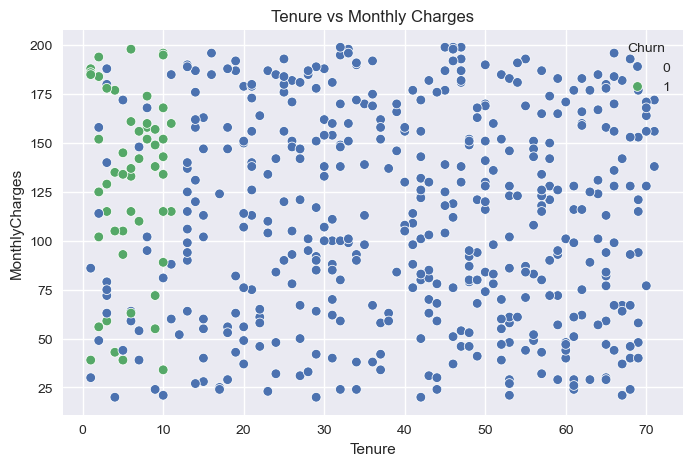

In [18]:
#Tenure vs Monthly Charges (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Tenure vs Monthly Charges")
plt.show()

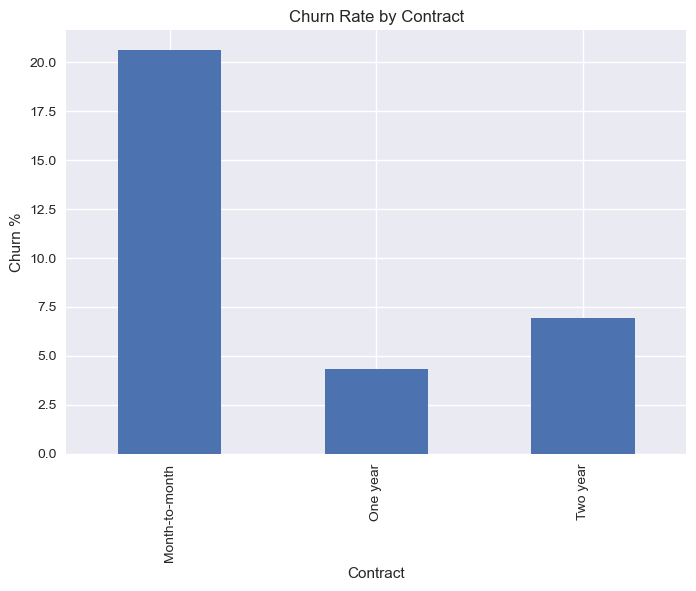

In [19]:
#Churn by Contract (Bar Chart)
churn_contract.plot(kind='bar')
plt.title("Churn Rate by Contract")
plt.ylabel("Churn %")
plt.show()

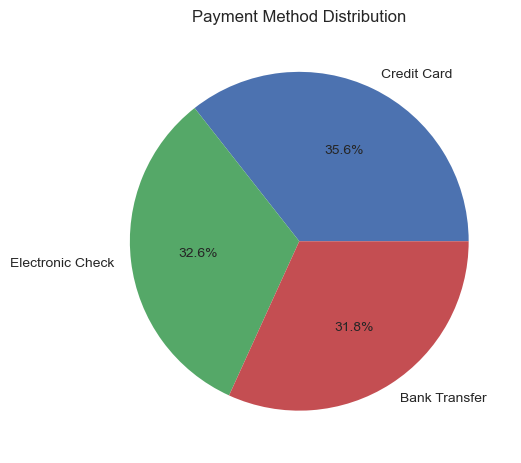

In [20]:
#Payment Method Distribution (Pie Chart)
df['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

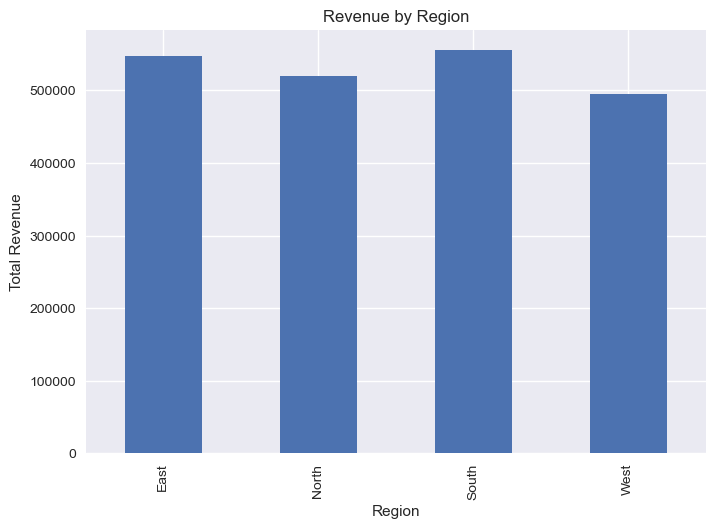

In [21]:
#Revenue by Region (Bar Chart)
region_revenue.plot(kind='bar')
plt.title("Revenue by Region")
plt.ylabel("Total Revenue")
plt.show()


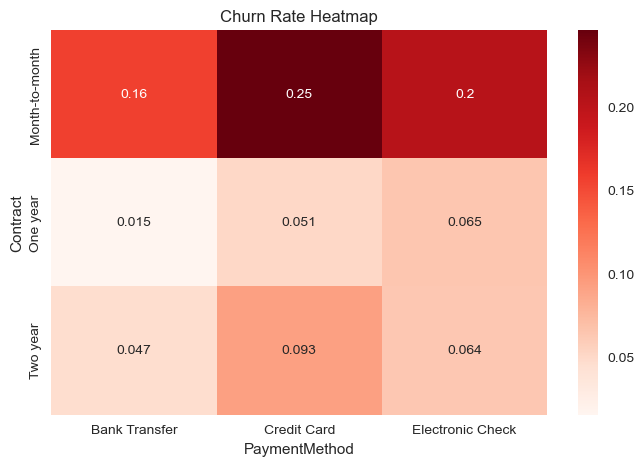

In [22]:
#Heatmap (Pivot Table)
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, cmap="Reds")
plt.title("Churn Rate Heatmap")
plt.show()

In [23]:
#FINAL REPORT METRICS (For Executive Summary)


print("CUSTOMER SALES ANALYSIS REPORT")
print("Total Revenue:", total_revenue)
print("Total Customers:", df['CustomerID'].nunique())
print("Average Monthly Charge:", df['MonthlyCharges'].mean())
print("Retention Rate:", retention_rate)

CUSTOMER SALES ANALYSIS REPORT
Total Revenue: 2118941
Total Customers: 500
Average Monthly Charge: 113.636
Retention Rate: 89.4
